# Exploring New York City High School SAT Scores

![NYC_Skyline_Image](http://2.bp.blogspot.com/-4xf9CZMWjlQ/T89_vq4-JCI/AAAAAAAADzA/oLERlmNAnsE/s1600/Manhattan+New+York+City+2.jpg)

In this project, we analyze a data set regarding SAT student scores along with addtional demographic data sets to determine what factors impact SAT scores.

The SAT (School Aptitude Test) is a test U.S high school students take before applying to college. The test consists of three sections, with an overall score of 2400 (atleast for our data set).  Colleges take SAT scores into account when admitting applicants, so it's important to perform well on it. The scores are also considered a measure of overall school district quality.

**Goal**: To combine data sets and compare demographic factors with SAT scores to determine what factors strongly influence SAT scores. To reach our goal, we will investigate:

* Exploring Enrollment and SAT Scores
* Impact of English Language Learners on SAT Scores
* Impact of Income on SAT Scores
* Racial Differences and SAT Scores
* Gender Differences and SAT Scores
* AP Exams and SAT Scores
* SAT Scores by Borough and District
* Impact of Survey Responses on SAT Scores

## Summary of Results

We concluded that:

* Schools with the highest percentage of non-native English-speakers are located in the Bronx borough and their average SAT scores tend to be lower than those of schools with less English Language Learning students.
* Children of low-income families (estimated by Free or Reduced Lunch eligibility - FRL) perform poorly on the SAT. Almost all schools with less than 40% FRL eligibility have an average score greater than 1200.
* Ranking of SAT scores by race follows the descending pattern of White, Asian, Black and Hispanic. Despite the existence of positive correlation between racial diversity and SAT scores, there are still other determinant factors when it comes to SAT score.
* Gender is not a strong determinant to a school's average SAT score, there was a weak correlation with SAT score for both genders to begin with.
* Schools with a high share of AP-test takers consistently score higher on the SAT, this was confirmed by a strong linear relationship between share of AP-test takers and SAT scores.
* Surveys show that safety and academic expectations positively influence SAT scores. Parents give the highest survey scores followed by teachers and then students. Most variability in survey scores came from teachers.

For more details, please refer to the the full analysis below.

## Concepts Used

* The basics of programming in Python (arithmetical operations, variables, common data types, etc.)
* Jupyter Notebook
* Working with Strings
* Object-oriented programming
* List and for loops
* Conditional statements
* Dictionaries
* Functions
* Data Aggregation
* Visualization libraries: matplotlib, seaborn, maps etc
* Pattern Extraction
* Regular Expressions (Regex)
* Combining Dataframes

# Background Research

A background research was conducted on the following topics below:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

Here are some key insights:

* Only high school students take the SAT test, so we'll only be focusing on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called DBN, or district borough number.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

# Data Overview

In this project, we'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).

Here is a link to all the data sets we'll be using:

* sat_results.csv - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) for each high school in New York City. This is the **MAIN** data set
* class_size.csv - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) for each school in New York City
* ap_2010.csv - Data on [Advanced Placement (AP)](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* graduation.csv - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a). The percentage of students who graudated, and other outcome information
* demographics.csv - Data on [demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) for each school
* survey_all.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) of parents, teachers, and students at each school
7. survey_d75.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) of parents, teachers, and students at each school
8. hs_directory.csv - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)

# Data Exploration

We will load the data set and look at the first couple of rows.

In [1]:
# Importing pandas
import pandas as pd

# Loading CSV files
data_files = ["ap_2010.csv","class_size.csv","demographics.csv","graduation.csv","hs_directory.csv","sat_results.csv"] # list of files to load
data = {} # dictionary to store dataframes
for file in data_files: # forloop to load files
    file_read = pd.read_csv('schools/' + file)
    file_name = file.split(".")[0]
    data[file_name] = file_read
    
# Loading txt files
all_survey = pd.read_csv('schools/survey_all.txt',delimiter="\t",encoding="windows-1252")
d75_survey = pd.read_csv('schools/survey_d75.txt',delimiter="\t",encoding="windows-1252")
survey = pd.concat([all_survey,d75_survey],axis=0)

We're mainly interested in the **sat_results** data set, we want to correlate selected information from this data set with information in other data sets.

In [2]:
# Exploring the sat_results data set
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


Here are some observations:

* The `DBN` is a unique ID for each school.
* The `SCHOOL NAME` column shows that we only have data about high schools
* There's a single row for each high school with a unique `DBN`
* We  can combine all the 3 SAT scores to have a comprehensive SAT score

Let's explore the remaining data sets.

In [3]:
# Exploring the remaining data sets
for key in data: # CSV files
    if key != "sat_results": 
        print (key + ' dataset')
        print(data[key].head(5))
        
print('survey dataset') # txt dataframe
print(survey.head()) 

class_size dataset
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS

Here are some observations:

* Each data set has a `DBN` column or the information to create one. We can use this column to combine data sets.
* Some data sets appear to contain multiple rows for each school. We'll have to do some preprocessing to ensure that each `DBN` is unique within every data set.
* There are 2773 columns for the **survey** dataframe! We'll have to remove unnecessary columns.
* The **survey** data set has a `dbn` column that we'll want to convert to uppercase `DBN` to make it consistent with other dataframes.

# Data Cleanup

## Dropping Unwanted Columns

We'll start by filtering columns we don't need in data sets. All data set dictionaries can be found in the links within the **Data Overview** section.

* **class_size data set**
 1. `DATA SOURCE` column since it isn't useful and a demographic we aren't interested in.
 2. `SERVICE CATEGORY(K-9* ONLY)` column doesn't include grades 10 and above.
 3. `SIZE OF SMALLEST CLASS` & `SIZE OF LARGEST CLASS`. We will use the `AVERAGE CLASS SIZE` variable instead.
 
* **graduation data set**
 1. We will remove all columns which include `Regents` in the name. The Regents exams are prepared by a conference of selected New York teachers. The teacher's assemble a test map that highlights the skills and knowledge required from the specific discipline's learning standards. To learn more about Regents exams, click [here](https://en.wikipedia.org/wiki/New_York_Regents_Examinations#Purpose). Since we are focusing on the SAT, we will filter these columns. 
 
* **demographics data set**
 1. We will filter `prek`-`grade8`, `Total Pre-K Enrollment (Half Day & Full Day)` since we are only interested in high schools.
 
* **hs_directory data set**

 1. Columns that provide extraneous school information -   `building_code`,`phone_number`,`fax_number`,`bus`,`subway`,`state_code`,`zip`,`website`,`overview_paragraph`,`program_highlights`.
 
 2. Columns regarding admission priorities - 
`priority01`,`priority02`,`priority03`,`priority04`,`priority05`,`priority06`,`priority07`,`priority08`,`priority09`,`priority10`
 
 3. Irrelevant school information - `expgrade_span_min`,`expgrade_span_max`,`psal_sports_boys`,`psal_sports_girls`,`psal_sports_coed`,`school_sports`,`addtl_info1`, `addtl_info2`,`start_time`,`end_time`.
 
* **survey data set**

 1. With over 2000 columns, we will filter columns that give us aggregate data about parents, teachers and students feeling about school safety, academic performance etc. Here's a screenshot below from the data dictionary.

![data_dic_image](https://s3.amazonaws.com/dq-content/xj5ud4r.png)

In [4]:
# Filtering data sets

# class_size data set
data["class_size"].drop(labels=['DATA SOURCE','SERVICE CATEGORY(K-9* ONLY)','SIZE OF SMALLEST CLASS','SIZE OF LARGEST CLASS'],inplace=True,axis=1)

# graduation data set
data['graduation'].drop(labels=['Total Grads - % of cohort','Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads','Local - % of cohort','Local - % of grads',
        'Still Enrolled - % of cohort','Dropped Out - % of cohort'],inplace=True,axis=1)

# demographics data set
data['demographics'].drop(labels=['prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
    'grade5', 'grade6', 'grade7', 'grade8'],inplace=True,axis=1)

# hs_directory data set
data['hs_directory'].drop(labels=['building_code','phone_number','fax_number','expgrade_span_min','expgrade_span_max',
                                 'bus','subway','state_code','zip','website','overview_paragraph','program_highlights',
                                 'psal_sports_boys','psal_sports_girls', 'psal_sports_coed',
                                 'school_sports','addtl_info1', 'addtl_info2','start_time','end_time','priority01','priority02',
                                'priority03', 'priority04', 'priority05', 'priority06','priority07', 'priority08', 'priority09', 'priority10'],inplace=True,axis=1)

# survey data set
survey_fields = ["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", # Columns to keep
    "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", 
    "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
    "saf_tot_11", "com_tot_11","eng_tot_11", "aca_tot_11",]

survey = survey.loc[:,survey_fields]
data["survey"] = survey # creating dataframe

## Creating & Updating Columns

### Renaming dbn columns to DBN

* The **hs_directory** dataframe does have a `dbn` column, so we can just rename it to `DBN`

In [5]:
# Creating the DBN column for hs_directory
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# Dropping the old dbn column
data["hs_directory"].drop(labels=['dbn'],inplace=True,axis=1)

# Verifying results
data['hs_directory'].head(2)

,school_name,boro,grade_span_min,grade_span_max,primary_address_line_1,city,total_students,campus_name,school_type,language_classes,...,partner_nonprofit,partner_corporate,partner_financial,partner_other,se_services,ell_programs,school_accessibility_description,number_programs,Location 1,DBN
0,Brooklyn School for Music & Theatre,Brooklyn,9,12,883 Classon Avenue,Brooklyn,399.0,Prospect Heights Educational Campus,NaN,Spanish,...,One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,This school will provide students with disabil...,ESL,Functionally Accessible,1,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548
1,High School for Violin and Dance,Bronx,9,12,1110 Boston Road,Bronx,378.0,Morris Educational Campus,NaN,Spanish,...,buildOn,Print International,NaN,Bronx Cares,This school will provide students with disabil...,ESL,Functionally Accessible,1,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543


The **survey** data set has a `dbn` column that we'll want to convert to uppercase `DBN` to make it consistent with other dataframes.

In [6]:
# Copying dbn column
data['survey']["DBN"] = data['survey']["dbn"]

# Deleting the dbn column
data['survey'].drop(labels=['dbn'],axis=1,inplace=True)

# Verifying results
data['survey'].head(2)

,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,DBN
0,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,...,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,01M015
1,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,...,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,01M019


### Creating DBN column

The **class_size data set** doesn't have a `DBN` column at all as is evident in the code block below.

In [7]:
# class_size data set
data['class_size'].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,19.0,1.0,19.0,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,21.0,1.0,21.0,NaN


In the code below, we can see that the `DBN` column in **sat_results** is a combination of `CSD` and `SCHOOL CODE` columns from the **class_size** data set. Also, the `DBN` column is padded, as the `CSD` portion of it consists of two digits.

In [8]:
# sat_results data set
data['sat_results'].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


So, in order to create the `DBN` column for the **class_size** data set, we will do the following:

1. Turn the `CSD` into `Padded CSD` if the `CSD` column consists of a single digit.

|CSD|Padded CSD|
|---|----------|
| 1 |    01    |

2. Add the `Padded CSD` and `SCHOOL CODE` columns to create the DBN column.

|Padded CSD|SCHOOL CODE|DBN|
|----------|-----------|---|
|    01    |   M015    |01M015|

In [9]:
# Creating the DBN column for class_size 
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(lambda x: str(x).zfill(2)) # padding CSD
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"] # creating DBN column

# Removing the padded_csd column
data['class_size'].drop(labels=['padded_csd'],axis=1,inplace=True)

# Verifying results
data["class_size"]["DBN"].value_counts()

15K429    57
09X505    56
09X517    56
15K448    52
21K690    52
10X243    51
25Q425    51
26Q430    49
02M655    49
10X141    49
30Q445    47
25Q285    47
20K490    47
08X405    47
21K525    46
22K405    46
31R460    46
31R455    46
31R440    46
14K586    46
30Q450    45
22K495    45
01M292    45
10X095    44
27Q410    44
31R445    44
21K540    44
14K071    44
27Q475    44
10X368    44
          ..
14K319     5
16K628     5
02M413     5
13K301     5
17K770     5
31R074     5
27Q051     5
22K326     5
20K748     4
20K686     4
01M364     4
12X198     4
03M417     4
03M402     4
24Q330     4
20K310     4
02M407     4
30Q280     4
10X079     4
04M964     3
20K971     3
03M452     3
24Q290     3
02M397     3
16K534     3
27Q273     3
20K264     3
27Q465     2
02M267     2
09X090     2
Name: DBN, Length: 1487, dtype: int64

### Creating Comprehensive SAT Scores

For the **sat_results** data set we will create a column that totals up the SAT scores for the different sections of the exam. We can use this column to correlate scores with other demographic factors because we'll be working with a single number, rather than three different ones.

To accomplish this, we'll add the three SAT score columns to create a comprehensive score. First, we'll have to convert the columns to numeric datatype, and then we'll add the columns.

In [10]:
# Converting individual sat score columns to numeric
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"],errors="coerce")
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"],errors="coerce")
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors="coerce")

# Creating comprehensive sat score column
data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]

# Verifying results
data["sat_results"].boxplot(column='sat_score')

All values within `sat_score` are within range (0-2400) with no outliers.

### Parsing Coordinates

For the **hs_directory** data set we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the **hs_directory** data set.

Let's take a look at a sample for the `Location 1` column in the **hs_directory** data set.

In [11]:
# hs_directory data set
data['hs_directory']['Location 1'][0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

The field contains a lot of information, and we just want to extract the coordinates, which will help us pinpoint any location on earth. We will use regular expression to extract the coordinates.

In [12]:
# Importing re module
import re

# Defining function to extract coordinates
def get_lat(string): # latitude function
    return re.findall("\(.+\)",string)[0].replace("(","").replace(")","").replace(",","").split()[0]

def get_long(string): # longitude function
    return re.findall("\(.+\)",string)[0].replace("(","").replace(")","").replace(",","").split()[1]

# Creating the "latitude" and "longitude" column in the hs_directory data set
data["hs_directory"]["latitude"] = data["hs_directory"]["Location 1"].apply(get_lat)
data["hs_directory"]["longitude"] = data["hs_directory"]["Location 1"].apply(get_long)

# Converting the "latitude" and "longitude" column to numeric datatype
data["hs_directory"]["longitude"] = pd.to_numeric(data["hs_directory"]["longitude"],errors="coerce")
data["hs_directory"]["latitude"] = pd.to_numeric(data["hs_directory"]["latitude"],errors="coerce")

# Verifying results
print(data["hs_directory"][["latitude",'longitude']].dtypes)
data["hs_directory"].head(5)

latitude     float64
longitude    float64
dtype: object


,school_name,boro,grade_span_min,grade_span_max,primary_address_line_1,city,total_students,campus_name,school_type,language_classes,...,partner_financial,partner_other,se_services,ell_programs,school_accessibility_description,number_programs,Location 1,DBN,latitude,longitude
0,Brooklyn School for Music & Theatre,Brooklyn,9,12,883 Classon Avenue,Brooklyn,399.0,Prospect Heights Educational Campus,NaN,Spanish,...,NaN,NaN,This school will provide students with disabil...,ESL,Functionally Accessible,1,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,High School for Violin and Dance,Bronx,9,12,1110 Boston Road,Bronx,378.0,Morris Educational Campus,NaN,Spanish,...,NaN,Bronx Cares,This school will provide students with disabil...,ESL,Functionally Accessible,1,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,Comprehensive Model School Project M.S. 327,Bronx,6,12,1501 Jerome Avenue,Bronx,543.0,DOE New Settlement Community Campus,NaN,Spanish,...,NaN,NaN,This school will provide students with disabil...,ESL,Functionally Accessible,1,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,Manhattan Early College School for Advertising,Manhattan,9,10,411 Pearl Street,New York,NaN,Murry Bergtraum Educational Campus,"NYC P-Tech 9-14, New School","N/A (Expected: Chinese [Mandarin], French, Spa...",...,NaN,NaN,This school will provide students with disabil...,ESL,Functionally Accessible,1,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,Queens Gateway to Health Sciences Secondary Sc...,Queens,6,12,160-20 Goethals Avenue,Jamaica,811.0,NaN,NaN,Spanish,...,Working in Support of Education (W!SE)- Financ...,NaN,This school will provide students with disabil...,ESL,Functionally Accessible,1,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


### Converting Columns to Numeric datatype

For the **ap_2010 data set** we need to convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the **ap_2010** data set to numeric values first.

There are three columns we'll need to convert:

* `AP Test Takers` (note that there's a trailing space in the column name)
* `Total Exams Taken`
* `Number of Exams with scores 3 4 or 5`

In [13]:
# Columns to convert
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5'] 

# Converting columns to numeric
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
# Verifying results
data["ap_2010"].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

## Condensing Data Sets

We will be combining data sets based on the `DBN` column. We'll need to condense data sets so that each value in the `DBN` column is unique. If not, we'll run into issues when it comes time to combine data sets.

A single row in the **sat_results** data set may match multiple rows in the **class_size** data set. This situation will create problems because we don't know which of the multiple entries in the **class_size** data set we should combine with the single matching entry in **sat_results**. The table illustrates the problem well:

|sat_results DBN|class_size DBN|
|---------------|--------------|
|01M022         |01M022        |
|05M345         |01M022        |
|02M456         |05M345        |
|99M520         |05M345        |

As we can see, there are multiple entries for the same `DBN` in the **class_size** data set.

The following data sets don't have unique `DBN` columns:
 * **ap_2010**
 * **class_size**
 * **demographics**
 * **graduation**

### Condensing `ap_2010` data set

In [14]:
# Finding duplicate values
duplicate_ap_2010 = data['ap_2010']['DBN'].value_counts()
print(duplicate_ap_2010[duplicate_ap_2010 > 1])

# Displaying results
data['ap_2010'][data['ap_2010']['DBN']=='04M610']

04M610    2
Name: DBN, dtype: int64


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...,41.0,55.0,29.0
52,04M610,YOUNG WOMEN'S LEADERSHIP SCH,NaN,NaN,NaN


It seems that the second row is a wrong entry with missing values. So we will remove it.

In [15]:
# Removing row 52
data['ap_2010'].drop(index=52,axis=0,inplace=True)

# Verifying results
data['ap_2010'][data['ap_2010']['DBN']=='04M610']

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...,41.0,55.0,29.0


### Condensing **class_size** data set

In [16]:
# Checking duplicates
duplicate_class_size = data['class_size']['DBN'].value_counts()
duplicate_class_size[duplicate_class_size > 1]

15K429    57
09X505    56
09X517    56
15K448    52
21K690    52
10X243    51
25Q425    51
26Q430    49
02M655    49
10X141    49
30Q445    47
25Q285    47
20K490    47
08X405    47
21K525    46
22K405    46
31R460    46
31R455    46
31R440    46
14K586    46
30Q450    45
22K495    45
01M292    45
10X095    44
27Q410    44
31R445    44
21K540    44
14K071    44
27Q475    44
10X368    44
          ..
14K319     5
16K628     5
02M413     5
13K301     5
17K770     5
31R074     5
27Q051     5
22K326     5
20K748     4
20K686     4
01M364     4
12X198     4
03M417     4
03M402     4
24Q330     4
20K310     4
02M407     4
30Q280     4
10X079     4
04M964     3
20K971     3
03M452     3
24Q290     3
02M397     3
16K534     3
27Q273     3
20K264     3
27Q465     2
02M267     2
09X090     2
Name: DBN, Length: 1487, dtype: int64

There are multiple duplicates in the **class_size** data set. Lets take a look at some rows.

In [17]:
# class_size data set
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,19.0,1.0,19.0,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,21.0,1.0,21.0,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,17.0,1.0,17.0,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,17.0,1.0,17.0,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,15.0,1.0,15.0,NaN,01M015


The first few rows all pertain to the same school and the same `DBN` appears more than once. Each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

Let's take a look at the value counts for these columns.

In [18]:
# Value counts for columns
cols = ["GRADE ","PROGRAM TYPE","CORE SUBJECT (MS CORE and 9-12 ONLY)","CORE COURSE (MS CORE and 9-12 ONLY)"]

for col in cols:
    print(data["class_size"][col].value_counts())
    print("\n")

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64


GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64


-                 10721
ENGLISH            4433
SCIENCE            3923
SOCIAL STUDIES     3606
MATH               3444
Name: CORE SUBJECT (MS CORE and 9-12 ONLY), dtype: int64


-                              10721
MS English Core                 1188
Integrated Algebra              1046
MS Math Core                    1003
MS Science Core                  990
MS Social Studies Core           987
Living Environment               941
Global History & Geography       889
US History & Government          741
English 9                        733
English 10                       690
Other Science                    682
English 11              

* For the `GRADE` column we'll only pick the rows equaling 09-12, since we're only concerned with high schools.
* For the `PROGRAM TYPE` column we'll go with the rows equaling GEN ED category because it is the largest by far.

Let's take a look at the dataframe after we make these changes.

In [19]:
# Filtering the class_size dataframe
data['class_size'] = data['class_size'][data['class_size']["GRADE "] == "09-12"]
data['class_size'] = data['class_size'][data['class_size']["PROGRAM TYPE"] == "GEN ED"]

# Saving school names according to DBN column
school_dict = {}
for i in range(1,data['class_size'].shape[0]):
    if data['class_size'].iloc[i,12] in school_dict:
        pass
    else:
        school_dict[data['class_size'].iloc[i,12]] = data['class_size'].iloc[i,3] 

# Verifying Updates
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,63.0,3.0,21.0,NaN,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,79.0,3.0,26.3,NaN,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,38.0,2.0,19.0,NaN,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,69.0,3.0,23.0,NaN,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,53.0,3.0,17.7,NaN,01M292


The `DBN` column still isn't unique. This is due to the `CORE SUBJECT (MS CORE and 9-12 ONLY)` and `CORE COURSE (MS CORE and 9-12 ONLY)` columns. These columns include different classes and subjects, and we want to keep all of this data. What we will do is take the average across all of the classes a school offers. This will give us unique **DBN** values, while also incorporating as much data as possible into the average.

We will, group the dataframe by unique `DBN` and then compute averages for the `AVERAGE CLASS SIZE` column.

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case `DBN`) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll reset the index to a list of integers and make `DBN` a column again.

In [20]:
# Average value for each column associated with each DBN in class_size

import numpy as np # Importing numpy as np
data['class_size'] = data['class_size'].groupby("DBN").agg(np.mean) # grouping by DBN and then taking average
data['class_size'].reset_index(inplace=True) # reseting index to keep the DBN column
data['class_size']['SCHOOL NAME'] = data['class_size']['DBN'].map(school_dict) # adding back the SCHOOL NAME column

# Verifying Updates
print("Rows in the dataset",data['class_size'].shape[0])
print("Unique DBN in the dataset",data['class_size']['DBN'].nunique())
data['class_size'].head(2)

Rows in the dataset 583
Unique DBN in the dataset 583


,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SCHOOLWIDE PUPIL-TEACHER RATIO,SCHOOL NAME
0,01M292,1,88.0,4.0,22.564286,NaN,Henry Street School for International Studies
1,01M332,1,46.0,2.0,22.000000,NaN,University Neighborhood Middle School


### Condensing **demographics** data set

In [21]:
# demographics data set
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,NaN,NaN,NaN,NaN,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,NaN,NaN,NaN,NaN,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,NaN,NaN,NaN,NaN,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,NaN,NaN,NaN,NaN,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,NaN,NaN,NaN,NaN,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


It seems that the only column that prevents `DBN` from being unique is `schoolyear`. We'll select the rows where `schoolyear` is 20112012, this will give us the most recent year of data, and also match our SAT results data.

In [22]:
# Filtering demographics 
data["demographics"] = data["demographics"][data["demographics"]['schoolyear'] ==  20112012]

# Verifying Updates
print("Rows in the dataset",data['demographics'].shape[0])
print("Unique DBN in the dataset",data['demographics']['DBN'].nunique())
data['demographics'].head(2)

Rows in the dataset 1509
Unique DBN in the dataset 1509


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,,,,,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,,,,,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2


### Condensing **graduation** data set

In [23]:
# graduation data set
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Local - n,Still Enrolled - n,Dropped Out - n
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,20,15,3
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,16,9,9
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,7,16,11
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,7,15,11


The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique.

A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. 

We will pick the most recent `Cohort` available, which is 2006 and since we want data from the full cohort, we'll only pick rows where `Demographic` is Total Cohort.

In [24]:
# Filtering Cohort
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

# Filtering Demographic
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Verifying Updates
print("Rows in the dataset",data['graduation'].shape[0])
print("Unique DBN in the dataset",data['graduation']['DBN'].nunique())
data['graduation'].head(2)

Rows in the dataset 405
Unique DBN in the dataset 405


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Local - n,Still Enrolled - n,Dropped Out - n
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,7,16,11
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,11,46,20


## Merging Data Sets

We are finally ready to merge data sets. We will be merging based on `DBN` columns and identify matching rows across data sets. We will start by merging two data sets and continue combining data sets in this way until we've merged all of them.

We'll focus on preserving as many rows as possible from **sat_results** while minimizing null values, as we are concerned with determining demographic factors that correlate with SAT score.

So we'll use different merge startegies with different data sets. 

* For data sets that have a lot of missing `DBN` values, an **inner** join is appropriate to avoid unnecessary null values.
* For data sets that have very little missing `DBN` values, we'll do a **left** join to retain most of the data in these data sets.

Let's start be determining the percentage of matching `DBN` values for each data set with the **sat_results** data set.

In [25]:
# Matching proportion for data sets
cols = ['ap_2010','graduation','class_size','demographics','survey','hs_directory'] # data set names

sat_results_set = set(list(data['sat_results']['DBN'])) # sat_results set

for i in cols: # for loop to get proportion between data sets
    col_set = set(list(data[i]['DBN']))
    col_len = len(list(data[i]['DBN']))
    print('Intersection for',i, len(sat_results_set.intersection(col_set))/col_len)
    

Intersection for ap_2010 0.9844357976653697
Intersection for graduation 0.9604938271604938
Intersection for class_size 0.7444253859348199
Intersection for demographics 0.2982107355864811
Intersection for survey 0.27614571092831963
Intersection for hs_directory 0.8482758620689655


We will:

* Use the left join for data sets with less missing values (**ap_2010**, **graduation** and **hs_directory**)
* Use the inner join for data sets with more missing values (**class_size**, **demographics** and **survey**)

Lets start merging data sets. We will be looking for high level correlations, so we won't dive into the missing `DBNs`.

In [26]:
# Combining dataframes
combined = data["sat_results"]
combined = combined.merge(data["survey"],how="inner",on="DBN")
combined = combined.merge(data["demographics"],how="inner",on="DBN")
combined = combined.merge(data["class_size"],how="inner",on="DBN")
combined = combined.merge(data["hs_directory"],how="left",on="DBN")
combined = combined.merge(data["graduation"],how="left",on="DBN")
combined = combined.merge(data["ap_2010"],how="left",on="DBN")

combined.head()

,DBN,SCHOOL NAME_x,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,rr_s,rr_t,rr_p,...,Cohort,Total Cohort,Total Grads - n,Local - n,Still Enrolled - n,Dropped Out - n,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,89.0,70,39,...,2006,78.0,43,7,16,11,NaN,NaN,NaN,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,84.0,95,10,...,2006,124.0,53,11,46,20,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,0.0,98,28,...,2006,90.0,70,3,15,5,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,40.0,100,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,90.0,100,21,...,2006,84.0,47,7,25,5,NaN,NaN,NaN,NaN


## Filling in Missing Values

We have many columns with missing (NaN) values due to left joins.

For now, we'll fill in the missing values with the overall mean for the column, which allows us to proceed with analyses that can't handle missing values (like correlations).

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the df.fillna() method along with the df.mean() method, because there won't be a mean. We will fill any NaN or null values that remain after the initial replacement with the value 0. 

In [27]:
combined_original = combined # original data set
combined = combined.fillna(combined.mean()) # Mean imputation
combined = combined.fillna(0) # 0 imputation

# Verifying results
combined.isnull().sum().sum()

0

## Creating `District` Column

We have a cleaned and combined data set to base our analysis on. Mapping the statistics out on a school district level is an interesting way to analyze our data. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN` column. We can apply a function over the `DBN` column of **combined** data set that pulls out the first two letters.

In [28]:
# Creating the shool_dist column
combined["school_dist"] = combined["DBN"].apply(lambda d: d[0:2])

# Verifying our updates
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

# Data Analysis

## SAT Score Correlations

We'll start by finding correlation between columns and `sat_score`.  We'll use the **r value**, also called the [Pearson's Correaltion Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) which measures how closely two sequences of numbers are correlated. A strong positive (values > 0.25) or negative (values < -0.25) correlation between a demographic factor and `sat_score` would be an interesting result meriting investigation. It's important to stress that an **r value isn't perfect and doesn't indicate that there's a correlation - just the possibility of one.**

To really assess whether or not a correlation exists, we'll visualize columns to discern patterns and dig deeper. If useful, we'll create maps to visualize differences at the district and borough level.

In [29]:
# Correlation with sat_score
correlations = combined.corr()
correlations = correlations['sat_score']
correlations.sort_values()

frl_percent                            -0.692577
sped_percent                           -0.402114
ell_percent                            -0.357960
hispanic_per                           -0.350349
black_per                              -0.293363
ell_num                                -0.129409
longitude                              -0.127329
latitude                               -0.118890
com_p_11                               -0.102058
male_per                               -0.101388
eng_p_11                                0.015858
rr_t                                    0.021185
aca_p_11                                0.025680
eng_t_11                                0.041891
black_num                               0.042646
hispanic_num                            0.051914
CSD                                     0.051945
sped_num                                0.057985
com_tot_11                              0.076559
rr_p                                    0.083436
eng_tot_11          

Unsurprisingly, `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score` and `SAT Writing Avg. Score` are strongly correlated with `sat_score`.

Other interesting observations include:

1. `total_enrollment` has a strong positive correlation with `sat_score` - this is surprising and counterintuitive. We'd expect smaller schools where students receive more attention to have higher scores. Other columns (`Total Cohort`, `NUMBER OF SECTIONS`, `AVERAGE CLASS SIZE`, `NUMBER OF STUDENTS / SEATS FILLED` and `total_students`) that are proxies correlate similarly.

2. The percentage of English Language Learners (`ell_percent`), Special Education (`sped_percent`) and Free & Reduced Lunch (`frl_percent`) show strong negative correaltion with `sat_score`.

3. There is significant racial (`white_per`, `asian_per`,`black_per` and `hispanic_per`) inequality in SAT scores.

4. The percentage and number of females (`female_per`, `female_num`) at a school correlate more positively with SAT score, compared to the percentage and number of males (`male_per`, `male_num`) respectively. This could indicate that women do better on the SAT than men.

5. `Number of Exams with scores 3 4 or 5` and `AP Test Takers` have strong correlations with SAT scores. This indicates that students taking challenging course work perform better on the SAT, which makes sense.

6. Survey responses show interesting results:

    * Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).

    * Total, Teacher and student ratings of school safety (`saf_tot_11`, `saf_t_11`, and `saf_s_11`) correlate positively with `sat_score`.
    
    * Number of students, parents and teachers (`N_s`, `N_p` and `N_t`) show strong positive correlation with `sat_score`

## Exploring Enrollment and SAT Scores

Because enrollment seems to have such a strong correlation ( 0.381051), let's make a scatterplot of `total_enrollment` vs. `sat_score`. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We will also plot proxies such as `Total Cohort` and `total_students`.

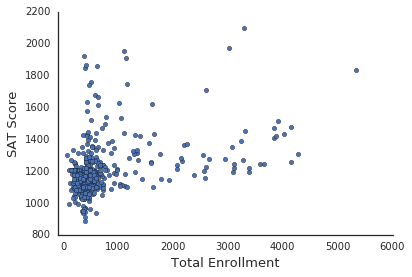

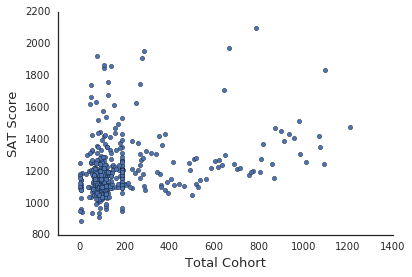

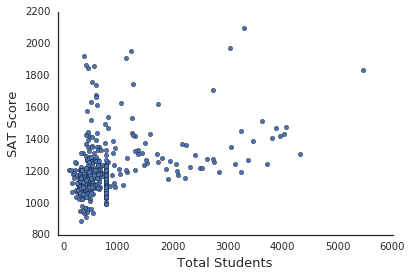

In [30]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Theme
sns.set_style("white")

# Scatterplots
fig_1 = combined.plot.scatter("total_enrollment","sat_score")
sns.despine()
fig_2 = combined.plot.scatter("Total Cohort","sat_score")
sns.despine()
fig_3 = combined.plot.scatter("total_students","sat_score")
sns.despine()

# Plot Aesthetics
fig_1.set_xlim(xmin= -100)
fig_2.set_xlim(xmin= -100)
fig_3.set_xlim(xmin= -100)

fig_1.set_xlabel("Total Enrollment", fontsize=13)
fig_1.set_ylabel("SAT Score", fontsize=13)
fig_2.set_xlabel("Total Cohort", fontsize=13)
fig_2.set_ylabel("SAT Score", fontsize=13)
fig_3.set_xlabel("Total Students", fontsize=13)
fig_3.set_ylabel("SAT Score", fontsize=13)

We see that there's a positive correlation as points line up when:

* `Total Students` exceeds 1000
* `Total Cohort` exceeds 200
* `Total Enrollment` exceeds 1000

However there's a large cluster of points when SAT scores are really low. Let's draw a scatter plot when `Total Students` are less than 1000 and research what kind of schools does the cluster comprise of.

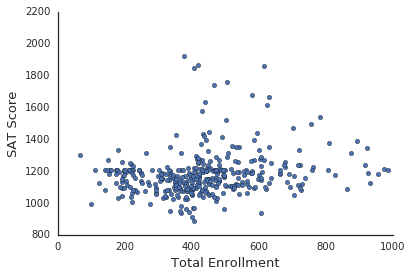

In [31]:
# Low Enrollment Scatterplot
fig_1 = combined.plot.scatter("total_enrollment","sat_score")

# Plot Aesthetics
sns.despine()
fig_1.set_xlabel("Total Enrollment", fontsize=13)
fig_1.set_ylabel("SAT Score", fontsize=13)
plt.xlim(0, 1000)
plt.show()

We see that for schools with low enrollement (less than 1000), which are the majority of schools, the correlation with SAT score is poor compared to high enrollment schools. Let's research some schools with low enrollment.

In [32]:
# Sample of low Enrollment Schools
low_enrol_bool = combined["total_enrollment"] < 1300
sat_score_bool = combined["sat_score"] < 1000
combined[low_enrol_bool & sat_score_bool]["SCHOOL NAME_x"].head(10)

113                 INTERNATIONAL COMMUNITY HIGH SCHOOL
154                 ACADEMY FOR LANGUAGE AND TECHNOLOGY
155                     BRONX INTERNATIONAL HIGH SCHOOL
169               KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
172               INTERNATIONAL SCHOOL FOR LIBERAL ARTS
214    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
218                       HIGH SCHOOL OF WORLD CULTURES
229                  BROOKLYN INTERNATIONAL HIGH SCHOOL
263                                 PACIFIC HIGH SCHOOL
276       INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS
Name: SCHOOL NAME_x, dtype: object

A quick google search shows the following information for some of the schools:

* ![intl_high_school](Images/Intl_high_school.PNG)
* ![intl_high_school_1](Images/Intl_high_school_1.PNG)
![intl_high_school_2](Images/Intl_high_school_2.PNG)

Our research reveals that most of the high schools with low total enrollment and low SAT scores have high percentgaes of English Language Learners. This indicates that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment`. Let's explore this further.

## Impact of English Language Learners  on SAT Scores

The percentage of English language learners at school (`ell_percent`) has a strong negative correlation (-0.357960) with SAT scores. Let's make a scatterplot for each to find interesting patterns.

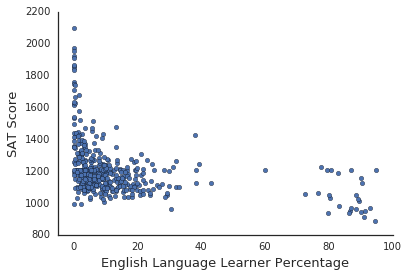

In [33]:
# Scatterplot
fig = combined.plot.scatter("ell_percent","sat_score")

# Plot Aesthetics
sns.despine()
fig.set_xlabel("English Language Learner Percentage", fontsize=13)
fig.set_ylabel("SAT Score", fontsize=13)
fig.set_xlim(xmin= -5)
plt.show()

Here are some observations:

* A strong negative correlation really exists

* The lower left corner of our graph has a straight line close to 0, indicating a very low percentage of English Language Learners. The SAT scores are very high. One possible explanation for this could be elite schools.

* There are two clusters within our plot, which could possibly explain schools particularly for Non-native English speakers and schools with support for Non-native English speakers.

* The lower right corner of our graph represents schools with more than 70% of ELL students with very low SAT scores. One possible explanation for this could be schools for immigrants, who have an additional challenge of adapting to a new culture, apart from following the main curriculum and learning English.

* One school stands out of the trend as an outlier, having around 40% of English learners and a relatively high SAT score. Let's find its name.

In [ ]:
# Outlier School
combined[(combined['ell_percent'] > 35) & (combined['sat_score'] > 1400)]['school_name']

55    High School for Dual Language and Asian Studies
Name: school_name, dtype: object

This resulted to be a dual language English-Mandarin Chinese academically demanding school.

* ![mandarin_phot](Images/mandarin.PNG)

Lets aggregate by district, which will enable us to understand how `ell_percent` varies district-by-district instead of the unintelligibly granular school-by-school variation.

In [ ]:
from mpl_toolkits.basemap import Basemap

# Grouping the dataframe by district
districts = combined.groupby('school_dist').mean()
districts.reset_index(inplace=True)

# Creating a map
plt.figure(figsize=(15, 10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h'
)

m.drawmapboundary(fill_color='#c1f2f8')
m.drawcoastlines(color='#6D5F47', linewidth=0.4)
m.drawrivers(color='#6D5F47', linewidth=0.4)
m.fillcontinents(color='white')
m.drawcounties(color='black',zorder=999)

longitudes = districts["longitude"].tolist()
latitudes = districts["latitude"].tolist()

# Plotting Districts 
m.scatter(longitudes,
          latitudes,
          zorder=2,
          latlon=True, 
          s=200,
          c=districts["ell_percent"],
          cmap='RdYlGn')

plt.colorbar()
plt.title('% of English Language Learners and Avg. SAT Score by District', fontsize=16, fontweight='bold')
plt.show()

As the above map confirms, the schools with the highest percentage of non-native English-speakers are located in the Bronx borough and their average SAT scores tend to be lower than those of schools with less English Language Learning students.

## Impact of Income on SAT Scores

We will look at how children of low-income families (estimated by Free or Reduced Lunch percentage - `frl_percent`) perform on the SAT. There is a strong negative correlation between `frl_percent` and SAT  scores, lets check to see if the scatterplot confirms this.

In [ ]:
# Scatterplot
fig = combined.plot.scatter("frl_percent","sat_score")

# Plot Aesthetics
sns.despine()
fig.set_xlabel("Free or Reduced Lunch Percentage", fontsize=13)
fig.set_ylabel("SAT Score", fontsize=13)
fig.set_xlim(xmin= -5)
plt.show()

The correlation is confirmed - no school with more than 60% FRL eligibility have an average SAT score above 1400 approximately. Almost all schools with less than 40% FRL eligibility have an average score greater than 1200.

## Racial Differences and SAT Scores
 
Racial inequality is one of the most pressing issues in the United States. The government has put in many efforts to close the oppurtunity gap between different race groups. Let's explore this further.

In [ ]:
# Race column
race_group = ['hispanic_per', 'black_per', 'asian_per', 'white_per']

# Plot Aesthetics
colors=[[255/255, 128/255, 14/255], [255/255, 128/255, 14/255], [95/255, 158/255, 209/255], [95/255, 158/255, 209/255]]


# Bar Graph and Lines
combined.corr()['sat_score'][race_group].plot.barh(figsize=(15, 7), color=colors,fontsize=23)
plt.axvline(x = 0.25, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
plt.axvline(x = -0.25, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
plt.axvline(x = 0, color = 'black', linestyle = '-',linewidth = 1)

# Plot Aesthetics
plt.title('SAT Scores Vs. Race correlations', fontsize=35)
plt.xlabel('Correlations Coefficient', size=23)
plt.xlim(-0.4, 0.7)

Observations:

* White and Asian show strong positive correalations, with White slightly dominating.

* Balck and Hispanic show strong negative correlations, with the Hispanic dominating slightly.

Let's take a look at the scatterplots for each race.

In [ ]:
# Figure
fig = plt.figure(figsize=(15,15))

# For loop for plotting
for i in range(len(race_group)):
    
    # Plotting scatterplots
    ax = fig.add_subplot(2,2,i+1)
    ax = plt.scatter(combined[race_group[i]],combined["sat_score"], color=[95/255, 158/255, 209/255])
    ax = plt.xlim(xmin= -5)
    
    # Plot Aesthetics
    race_title = race_group[i].replace('_per','').capitalize()
    ax = plt.title('Share of {} Students Vs. SAT Scores'.format(race_title), fontsize=14, fontweight='bold')
    ax = plt.xlabel('Share of {} Students'.format(race_title))
    ax = plt.ylabel('SAT Score' if i == 0 or i == 2 else '') 
    sns.despine()

Observations:

* Schools with a high share of Hispanic and Black students do consistently show lower SAT scores as indicated by the downward trend. 

* Schools with a high share of Asian and White students do consistently show higher SAT scores as indicated by the upward trend

* We see more variability in SAT scores when the share of students is greater than 25% for Asian and White students compared to Hispanic and Black students.

* An interesting observation is when the share of Hispanic students is more than 25% - we never see a maximum SAT score higher than 1500. As soon as the sharee decreases from 25%, the number of schools with high SAT scores drastically increases.

### Majority Hispanic Schools

Let's take a closer look at schools with a majority (> 95%) of Hispanic students.

In [ ]:
# Majority Hispanic Student Schools
combined[combined['hispanic_per'] > 95][['school_name', 'sat_score']]

A quick google search shows the following information for some schools:

* ![pan_american_photo](Images/Pan_American_High_School.PNG)
* ![gregorio_photo](Images/gregorio.PNG)
* ![manhattan_phot](Images/manhattan_bridges.PNG)

These schools are specialized to teach immigrants arriving from Spanish-speaking countries, who may not be well-prepared for high school. There may also be a possibility that these students weren't  recieving an adequate education from their native countries, making them weaker candidates in both English and Spanish. Within this context, it's not surprising that these school score lower on the SAT.

### Minority Hispanic Schools

Now, lets take a closer look at students with a minority (< 10%) of Hispanic students and a SAT score greater than 1800.

In [ ]:
# Minority Hispanic Student Schools
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)][['school_name', 'sat_score']]

A quick google search shows the following information for some schools:

* ![stuyvesant_photo](stuyvesant_high.PNG)
* ![bronx_school](Bronx_school.PNG)

These schools are some of the most famous and sought after schools in all of United States. With a greuling curriculum, admissing tests and accepting city residents. This explains why there are very few residents and why average SAT scores are really high.

### Racial Diversity

It would be interesting to see how schools with more balanced racial composition perform.

We'll be using the [Gini-Simpson index](https://en.wikipedia.org/wiki/Diversity_index#Simpson_index) to evaluate racial diversity in schools. If the index equals its minimum value (i.e., zero) there is very little diversity and members are grouped in the same category. In contrast, a higher index number indicates more diversity. Here's the formula:


![gini_photo](Images/gini.PNG)

* λ equals the probability that two entities taken at random from the data set of interest (with replacement) represent the same type
* *p* represents the probability for the particular entity
* *R* represnts the number of entitites

In [ ]:
# Gini-Simpson Calculation
combined["gini-simpson"] = 1 - (combined[race_group[0]]/100)**2 - (combined[race_group[1]]/100)**2 - (combined[race_group[2]]/100)**2 - (combined[race_group[3]]/100)**2

# Plotting scatterplot for Gini-Simpson Vs. SAT Scores
plt.scatter(combined["gini-simpson"],combined["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Racial Diversity Score Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.xlabel('Gini-Simpson Index Score', fontsize=13)
plt.axvline(x = 0.5, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
plt.axhline(y = 1500, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
plt.ylabel('SAT Score', fontsize=13)
plt.xlim(-0.05)
sns.despine()

There seems to be a slight positive correlation between racial diversity and SAT score. Further observations include:

1. There's a cluster of schools in the bottom left corner with almost zero diversity and extremely low SAT score results

2. Only schools with a Gini-Simpson index greater than 0.5 have SAT scores greater than 1500 (with the exception of two outliers, scores of around 1800 and 2100)

3. The school with the highest average SAT score surprisingly has a Gini-Simpson index close to 0.4

4. The number of schools with balanced racial composition (Gini-Simpson index close to 0.7) is relatively small

Let's take a deeper look at observation **(1)**

In [ ]:
# Low Racial Diversity Schools
low_gini_schools = combined[combined["gini-simpson"] < 0.05]
low_gini_schools[['SCHOOL NAME_x','white_per','asian_per','black_per','hispanic_per','sat_score']]

Most schools with a low Gini-Simpson index have a majority Hispanic population. We've already found that these schools are specialized to teach immigrants arriving from Spanish-speaking countries, who may not be well-prepared for high school.

Let's look to see if there's any factors that correlate negatively with low Gini-Simpson index scoring schools.

In [ ]:
low_gini_schools.corr()['sat_score'].sort_values().head(10)

The first relevant factor with the strongest r-value is `ell_percent` - **English Language Learners percentage**. This makes sense as most Spanish speaking immigrant schools have students that are learning English, which puts them at a disadvantage when it SAT preparation.

Now, let's take a look at schools with a higher Gini-Simpson index score, or in other words a balanced racial composition.

In [ ]:
# High Racial Diversity Schools
high_gini_schools = combined[combined["gini-simpson"] > 0.7]
high_gini_schools[['SCHOOL NAME_x','white_per','asian_per','black_per','hispanic_per','sat_score','gini-simpson']].sort_values(by=['gini-simpson'],ascending=False).head(5)

Looking at the top 5 schools according to Gini-Simpson Index, we still see a lot of variability when it comes to SAT scores. This confirms that despite the existence of positive correlation between racial diversity and SAT scores, there are still other determinant factors when it comes to SAT scores.

Let's take a look at what factors do high ranking Gini-Simpson schools correlate with.

In [ ]:
high_gini_schools.corr()['gini-simpson'].sort_values(ascending=False)

Safety and academic surveys (`saf_t_11`, `aca_t_11`) have a positive correlation with gini-simpson scores. The percentage of English language learners (`ell_percent`) and free-and-reduced-price lunch programs (`frl_percent`) have a negative correlation with gini-simpson scores. This does follow the general trend for schools in New York City overall.

## Gender Differences and SAT Scores

In [ ]:
# Ploting gender correlations bar graph
combined.corr()['sat_score'][['male_per','female_per']].plot.barh(figsize=(15, 7), color=[[255/255, 128/255, 14/255],[95/255, 158/255, 209/255]],fontsize=23)
plt.axvline(x = 0, color = 'black', linestyle = '-',linewidth = 1)

# Plot Aesthetics
plt.title('SAT Scores Vs. Gender Correlations', fontsize=35)
plt.xlabel('Correlation Coefficients', size=23)
plt.xlim(-0.12, 0.12)

We see that women show a positive correlation whereas men show a negative correlation when it comes to SAT scores. To dig deeper, let's plot the female percentage values and SAT scores.

In [ ]:
# Plotting scatterplot for Female Percentage vs. SAT Scores
plt.scatter(combined["female_per"],combined["sat_score"], color=[95/255, 158/255, 209/255])
plt.scatter(combined[combined["sat_score"] > 2000]["female_per"],combined[combined["sat_score"] > 2000]["sat_score"], color="red") # highest scoring school
plt.scatter(combined[combined["female_per"] < 4]["female_per"],combined[combined["female_per"] < 4]["sat_score"],color="orange") # Almost no female schools
plt.scatter(combined[combined["female_per"] > 95]["female_per"],combined[combined["female_per"] > 95]["sat_score"],color="darkblue") # Almost no female schools

# Plot Aesthetics
plt.title('Female Percentage Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Female Percentage', fontsize=13)
plt.axvline(50, linestyle='--',color = [207/255, 207/255, 207/255])
plt.xlim(-2,105)
sns.despine()

Naturally, the percentage of males would be mirrored with respect to the 50% separation line.

Here are a few other notable observations:

1. The majority of schools have a somewhat balanced composition of both genders, with each gender ranging from 40 to 60%.

2. Surprisingly, the highest scoring school (red dot) has a minority of female students (approximately 40%). 

3. There are approximately 6 schools (dark blue dots) with almost only female students and around 3 schools (orange dots) with almost only male students.

4. Another group of high SAT scores, the bigger and more spread-out one, is located immediately to the right of the separation line, with the amount of female students ranging from 50 to 80%. This seems to be potentially contributing to the positive correaltion.

### Female Minority & Majority Schools

Let's take a closer look at observation **(3)**

In [ ]:
# Extreme Female Minority Schools
combined[combined["female_per"] < 4][['SCHOOL NAME_x','sat_score','female_per','male_per']]

A quick google search shows the following results:
    
* ![urban_phot](Images/urban_academy.PNG)
* ![eagle_phot](Images/eagle_academy.PNG)
    
These schools seemed to be made especially for men in need order to accomodate specific needs (extra academic support, color inclusivity etc.)

In [ ]:
# Extreme Female Majority Schools
combined[combined["female_per"] > 95][['SCHOOL NAME_x','sat_score','female_per','male_per']].head(5)

A quick google search shows the following results:
    
* ![urban_assembly](Images/urban_assembly.PNG)
* ![urban_criminal](Images/urban_criminal.PNG)
    
These schools seemed to be made especially for women in need order to accomodate specific needs but fall short due to specific reasons such as poor attendance, bullying, conservative background etc.

### High Performing Majority Female Schools

Lets take a closer look at observation **(4)**

In [ ]:
# High Performing Majority Female Schools
combined[combined["female_per"] > 60][combined["sat_score"] > 1700][['SCHOOL NAME_x','sat_score','female_per','male_per']].head(5)

A quick google search shows the following results:
    
* ![ELRO_school](Images/ELRO.PNG)
* ![townsend_school](Images/Townsend.PNG)
    
These schools have high educational standards, college-level classes and a record of sending students to college.

In conclusion, gender is not a strong determinant to a school's average SAT score, there was a weak correlation with SAT score for both genders to begin with.

## AP Exams and SAT Scores

[Advanced Placement (AP)](https://en.wikipedia.org/wiki/Advanced_Placement) is a program in the United States and Canada created by [College Board](https://www.collegeboard.org/) which offers college-level curricula and examinations to high school students.

Before we explore how challenging coursework impacts SAT scores. We will calculate the share of students (variable) that took AP exams to minimize the influence of `total_enrollment` which also correlates positively with SAT scores.

In [ ]:
# Creating variable ap_share
combined['ap_share'] = combined['AP Test Takers '] / combined['total_enrollment']

# Plotting scatterplot for Share of AP test takers Vs. SAT Scores
plt.scatter(combined["ap_share"],combined["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Share of AP Test Takers Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Share of AP Test Takers', fontsize=13)
plt.axhline(1500, linestyle='--',color = [207/255, 207/255, 207/255])
plt.xlim(-.05,1.01)
sns.despine()

There are 2 main observations:

* We can see a positive correlation for a number of schools and increasing SAT scores. These schools can be seen above the dashed line. These schools seem to be somewhat selective, so due to better academic aptitudes their students might benefit more from the AP courses than other students.

* The other group of schools show average SAT scores and very high shares of AP-test takers. Since almost all these schools have SAT score that are equal to the average of the data set, it may be the case that they are missing or imputed. 

Let's explore our second observation further by looking at the missing values and value counts.

In [ ]:
# Null Value Percentage
combined_original[['AP Test Takers ', 'Number of Exams with scores 3 4 or 5', 'Total Exams Taken']].isnull().sum()/combined.shape[0]

Since there are many missing values, let's take a look at the scatterplot without imputation.

In [ ]:
# creating variable ap_share
combined_original['ap_share'] = combined_original['AP Test Takers '] / combined_original['total_enrollment']

# Plotting scatterplot for Share of AP test takers Vs. SAT Scores
plt.scatter(combined_original["ap_share"],combined_original["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Share of AP Test Takers Vs. SAT Scores - No Imputation', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Share of AP Test Takers', fontsize=13)
plt.xlim(-.005,0.6)
sns.despine()

After removing imputations, we can confirm that there is a strong positive correlation between AP-test takers and SAT scores. The second cluster we saw in our original scatterplot was a consequence of imputation, which evidently, was not a good approach.

## SAT Scores by Borough and District

In [ ]:
# Score by Borough
sat_by_borough = combined.groupby('boro').agg(np.mean)['sat_score'].sort_values(ascending=False)
print(sat_by_borough)


# Creating a District Map
plt.figure(figsize=(15, 10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h'
)
m.drawmapboundary(fill_color='#c1f2f8')
m.drawcoastlines(color='#6D5F47', linewidth=0.4)
m.drawrivers(color='#6D5F47', linewidth=0.4)
m.fillcontinents(color='white')
m.drawcounties(color='black',zorder=999)

# Plotting districts
m.scatter(
    longitudes, 
    latitudes, 
    s=200, 
    zorder=2, 
    latlon=True, 
    c=districts['sat_score'],
    cmap='rainbow'               # A rainbow template, with red - the highest SAT score, 
)                                # violet - the lowest

plt.colorbar()
plt.title('Average SAT Scores by District', fontsize=23)
plt.show()


If to look only at the statistics by borough, it looks like the highest SAT scores are related to Staten Island. However, the map shows that this borough is actually represented by only one district, hence it's definitely under-sampled. In Brooklyn and Bronx there are many districts characterized by very low SAT scores. On the other hand, in Brooklyn there is a district with the highest SAT score, and it's the same district that had also the highest safety and respect score on the previous map.

## Impact of Survey Responses on SAT Scores

In [ ]:
# Removing DBN
survey_fields = survey_fields[1:]

# Survey field correlations
survey_fields_corr = correlations[survey_fields].sort_values()
colors=["darkblue" if (x > 0.25) else ([95/255, 158/255, 209/255] if (x > 0) else [255/255, 128/255, 14/255]) for x in survey_fields_corr]

# Bar graph
survey_fields_corr.plot.barh(figsize=(15, 7), color=colors,fontsize=13)
plt.axvline(x = 0.25, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
plt.axvline(x = 0, color = 'black', linestyle = '-',linewidth = 1)

# Plot Aesthetics
plt.xlim(-0.12, 0.45)
plt.title('Correlation of Survey Responses and SAT scores', fontsize=16, fontweight='bold')
plt.ylabel('Survey Fields', fontsize=13)
plt.xlabel('Correlation', fontsize=13)
sns.despine()

We can observe three sets of groups from the plot above:

1. Strongly correlated responses (dark blue)
    * Number of parents, students and teachers (`N_p`,`N_s`,`N_t`) are stronlgy correlated with SAT scores.
    * Teacher, Total and Student (`saf_t_11`.`saf_tot_11`.`saf_s_11`) safety surveys are strongly correlated with SAT scores.
    * Student academic expectations (`aca_s_11`) correlate strongly compared to teacher and parent expectations.
    
2. Positively correlated responses (light blue)
    * Academic and Safety (`aca_p_11`,`saf_p_11`) surveys from parents are weak positive correlation with SAT scores.
    * Communication Surveys for student, teachers and total (`com_s_11`,`com_t_11`,`com_tot_11`) are weak positive correlation with SAT scores.
    *  Engagement Surveys (`eng_tot_11`,`eng_t_11`,`eng_s_11`,`eng_p_11`) for all are weak positive correlation with SAT scores.
    * Teacher and Student response rates (`rr_t`,`rr_p`) show weak positive correlation with SAT Scores.
  
3. Negatively correlated responses (orange)
    * Communication surveys for parents show negative correlation with SAT scores.

### Safety Survey and SAT Scores

Let's take a closer look at the correlation between safety and SAT scores.

In [ ]:
### Plotting scatterplot for Student Safety Surveys Vs. SAT Scores
plt.scatter(combined["saf_s_11"],combined["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Student Safety Surveys Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Safety Survey Score', fontsize=13)
plt.xlim(4.8,9)
sns.despine()
plt.show()

### Plotting scatterplot for Teacher Safety Surveys Vs. SAT Scores
plt.scatter(combined["saf_t_11"],combined["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Teacher Safety Surveys Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Safety Survey Score', fontsize=13)
plt.xlim(4.8,9)
sns.despine()
plt.show()

### Plotting scatterplot for Safety Surveys Vs. SAT Scores
plt.scatter(combined["saf_tot_11"],combined["sat_score"], color=[95/255, 158/255, 209/255])

# Plot Aesthetics
plt.title('Total Safety Surveys Vs. SAT Scores', fontsize=13, fontweight='bold')
plt.ylabel('SAT Score', fontsize=13)
plt.xlabel('Safety Survey Score', fontsize=13)
plt.xlim(4.8,9)
sns.despine()
plt.show()

Here are some observations:

* All three scatterplots confirm a positive correlation between safety and SAT scores.

* We can see a pattern of schools with high SAT scores simultaneously having high Safety scores (starting from 6.5 for students and 7 for teachers and total).

* Despite the positive correlation, there are still quite a few schools with relatively high Safety score but poor SAT score.

* For all three scatterplots, the highest scoring SAT schools don't score the highest Safety score (9) 


We can conclude that although a safe environment is important but it's not the only unique factor for high SAT scores.

### Safety Score by Borough

Let's see the aggregate data by districts and borough.

In [ ]:
# Average Safety score for each borough

# Safety scores for students, teacher and total
student_data = combined.groupby('boro').agg(np.mean)['saf_s_11'].sort_values(ascending=False)
teacher_data = combined.groupby('boro').agg(np.mean)['saf_t_11'].sort_values(ascending=False)
total_data = combined.groupby('boro').agg(np.mean)['saf_tot_11'].sort_values(ascending=False)

# Creating dataframe
boro_safety = pd.DataFrame()
boro_safety['Student'] = student_data
boro_safety['Teacher'] = teacher_data
boro_safety['Total'] = total_data
boro_safety = boro_safety.drop(index=0)

# Displaying results
boro_safety

In general, we can conclude that students, teacher and total survey respondents rank Manhattan & Queens with the highest safety scores and Staten Island & Brooklyn with the lowest safety scores.

### Safety Score by District

Let's map the score by districts now, we'll use the `saf_tot_11` as as the overall representative column. 

In [ ]:
from mpl_toolkits.basemap import Basemap

# Grouping the dataframe by district
districts = combined.groupby('school_dist').mean()
districts.reset_index(inplace=True)

# Creating a map
plt.figure(figsize=(15, 10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h'
)
m.drawmapboundary(fill_color='#c1f2f8')
m.drawcoastlines(color='#6D5F47', linewidth=0.4)
m.drawrivers(color='#6D5F47', linewidth=0.4)
m.fillcontinents(color='white')
m.drawcounties(color='black',zorder=999)

longitudes = districts['longitude'].tolist()
latitudes = districts['latitude'].tolist()

# Plotting districts
m.scatter(
    longitudes, 
    latitudes, 
    s=200, 
    zorder=2, 
    latlon=True, 
    c=districts['saf_tot_11'],
    cmap='RdYlGn'               # A traffic-light template, with green - the safest, 
)                               # red - the least safe

plt.colorbar()
plt.title('Average Safety Scores by District', fontsize=23)
plt.show()

It seems that our previous conclusion was actually biased: there is only one district with very low safety score located in Brooklyn (we also see the district with the highest score) and this value definitely influences the entire average score, making it heavily negatively skewed.

### Difference between Survey Responses for Parents, Teachers & Students

Let's see if survey responses for the three groups (parent, teacher & students) have substantial variability in their scores. We are looking for differences at the group level. We have 4 types of surveys:

* Safety 
* Communication
* Engagement
* Academic Expectations

In [ ]:
# List of comparison fields
survey_comp_fields = [
    ['saf_p_11', 'saf_t_11', 'saf_s_11'],
    ['com_p_11', 'com_t_11', 'com_s_11'],
    ['eng_p_11', 'eng_t_11', 'eng_s_11'],
    ['aca_p_11', 'aca_t_11', 'aca_s_11']
]

# plot titles
survey_plot_titles = [
    'Safety Score Comparison',
    'Communication Score Comparison',
    'Engagement Score Comparison',
    'Academic Expectation Score Comparison'
]

# Figure size
fig = plt.figure(figsize=(15,15))

# Plots
for i in range(len(survey_comp_fields)):
    ax = fig.add_subplot(2,2,i+1)
    ax = plt.boxplot(combined[survey_comp_fields[i]].values,labels=['Parents', 'Teachers', 'Students'])
    ax = plt.title(survey_plot_titles[i], fontsize=20)
    ax = plt.tick_params(labelsize=15)
    ax = plt.ylim(2, 10)
    if i == 0 or i == 2:
        ax = plt.ylabel('Score',size=15)

Here are some observations:

* Parents tend to give higher scores compared to Teachers and Students
* Most variability in scores comes from Teachers
* Students usually tend to give the lowest scores
* The bigggest difference between median scores is observed in Communication (Parents Vs. Students)

# Conclusion

In this project we cleaned, combined and analyzed multiple data sets containing information about SAT scores and demographic factors for New York City high schools. In particular, we delved into understanding the relationship between individual demographic factors and SAT scores to detect possible biases in the SAT. In addition, we also looked at surevy data to understand how parents teachers and students view certain factors and their effects on SAT scores. Our main findings from this project include:

* Positive correlations with SAT scores: Total enrollment, Female percentage, White and Asian race percentage, AP-test takers percentage, Class size and Survey safety scores.

* Negative correlations with SAT scores: English Language Learners percentage, Male percentage, Black and Hispanic percentages, Free and Reduced Lunch percentages (indicator of family income).

* Biases in borough level statistics exposed through district level maps.

* Parents giving the highest SAT scores followed by teachers and then students.